In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [175]:
G = nx.karate_club_graph()

In [176]:
from itertools import combinations
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [177]:
#equetion 1:selection constrain
def selection_constrain_of(i):
     # degree of N_i:
        N_i = subgraph_of(i).number_of_nodes()
        # sum(sdeg_j):
        sum_sdeg_j = subgraph_of(i).number_of_edges()
        # number of triangles: nodes
        NT_i = nx.triangles(G,i)
        if NT_i > 1:
        #equetion 1:selection constrain        
            TR_i = (N_i-(sum_sdeg_j/2))            
        return  TR_i   

In [178]:
#Selection Algorithm
def Selection_Algorithm():
    # main part of AL loop
    i=0
    valid_set = []
    for i in G.nodes: 
        subgraph = subgraph_of(i)
        # degree of Ni:
        N_i = subgraph.number_of_nodes()
        # number of triangles: nodes
        NT_i = nx.triangles(G,i)
        # Extract the nodes of interest: nodes
        nodes = [n for n, d in subgraph.nodes(data=True)]
        # Create the set of nodes: nodeset
        nodeset = set(nodes)
        #equetion 1:selection constrain
        if NT_i > 1:
            TR_i = selection_constrain_of(i)
            i+=1        
            list1 = [NT_i]        
            valid_set.append(list1)
                
    return  valid_set

In [183]:
#Selection_Algorithm()

In [353]:
a=[n for n in G.neighbors(0)]

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [348]:
#return subgraphs
def subgraph_of(i):
    subgraph = G.subgraph(nodes_in_triangle(G, i))      
    return  subgraph  

Zachary's Karate Club


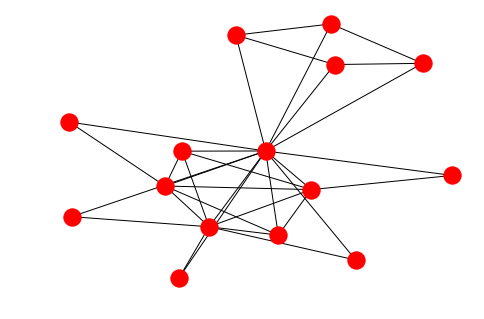

In [350]:
k=0
print(subgraph_of(k))

h=subgraph_of(k)
nx.draw(h, data=True)
plt.show()

In [292]:
#Graph Entropy 
def log1(i):
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    s1 = math.log(sum_sdeg_i, 10)
    return  s1

In [293]:
log1(5)

1.6989700043360185

In [294]:
def prob(i, j): 
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    nodes = subgraph_of(i).nodes
    degree = subgraph_of(i).degree[j]
    prob=degree/sum_sdeg_i 
    return prob  

In [295]:
def log2(i,j):
    degree = subgraph_of(i).degree[j]
    log_j = math.log(degree, 10)
    return log_j

In [354]:
def probs(i):
    probs=[]
    for i in subgraph_of(i).nodes:
        for j in subgraph_of(i).nodes:
            enr = (prob(i, j)*log2(i,j)) 
            #enr=(i, en)
        probs.append(enr)  
    return probs 

In [364]:
sum_sdeg_i = (subgraph_of(33).number_of_edges()*2)
s1 = math.log(sum_sdeg_i, 10)
si=s1-sum(probs(32))
NT_i = nx.triangles(G,32)
print('number of triangles:(NT_i) =',NT_i)
print(si,s1,sum(probs(33)))

number of triangles:(NT_i) = 13
0.5088440327806674 1.7634279935629371 1.4887184018542552


In [242]:
def PI_of(i):
    sum_sdeg_i = (subgraph_of(i).number_of_edges()*2)
    s1 = math.log(sum_sdeg_i, 10)
     #equetion 4:en value of PI_i
    PI_i = s1-sum(probs(i))
    return PI_i

In [359]:
PI_of(33)

0.2747095917086819

In [ ]:
def loop_PI():
    i=0
    PI_list=[]
    NT_i = nx.triangles(subgraph_of(i),i)
    for i in subgraph_of(i).nodes:         
        if NT_i > 1:
            PI_i = PI_of(i)
            i+=1
            PI = (i , PI_i) 
            PI_list.append(PI)  
            
    return  PI_list

In [204]:
loop_PI()

[(1, 0.719382152581787),
 (2, 0.8935942584771066),
 (3, 1.065257375545904),
 (4, 0.9973709092450376),
 (5, 0.8271765292750537),
 (6, 0.8901629471032395),
 (7, 0.8901629471032395),
 (8, 1.014006256742699),
 (9, 0.9971588664041136),
 (11, 0.8271765292750537),
 (13, 0.5931432322151551),
 (14, 1.014006256742699),
 (18, 0.6533492313479513),
 (20, 0.6533492313479513),
 (22, 0.6533492313479513)]